<a href="https://colab.research.google.com/github/Anggarciaar/Proyecto_AnalisisGeoespacial/blob/main/Proyecto_AnalisisGeoespacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import os
base_dir="/content/drive/MyDrive/DATA_ProyectoAG"
print(base_dir)

/content/drive/MyDrive/DATA_ProyectoAG


In [ ]:
!pipintall pandas


/bin/bash: pipintall: command not found


In [ ]:
import geopandas as gpd
import pandas as pd

ModuleNotFoundError: ignored

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 9.9 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
import geopandas as gpd

In [ ]:
Departamentos = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Emisiones_Departamento/EA_TCNCC_EN_100K_2016.shp")

In [ ]:
Departamentos.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cod_depto   33 non-null     object  
 1   departamen  33 non-null     object  
 2   ems_nts_GE  33 non-null     float64 
 3   IPPC_energ  33 non-null     float64 
 4   IPPC_IPPU   33 non-null     float64 
 5   IPPC_AFOLU  33 non-null     float64 
 6   IPPC_resid  33 non-null     float64 
 7   sctr_fores  33 non-null     float64 
 8   sctr_indus  33 non-null     float64 
 9   sctr_agrop  33 non-null     float64 
 10  sctr_trans  33 non-null     float64 
 11  sctr_minas  33 non-null     float64 
 12  sctr_sanea  33 non-null     float64 
 13  sctr_resid  33 non-null     float64 
 14  sctr_comer  33 non-null     float64 
 15  area_ha     33 non-null     float64 
 16  SHAPE_Leng  33 non-null     float64 
 17  SHAPE_Area  33 non-null     float64 
 18  RULEID      33 non-null     int64   
 19  ge

In [ ]:
Departamentos.head(32)

,cod_depto,departamen,ems_nts_GE,IPPC_energ,IPPC_IPPU,IPPC_AFOLU,IPPC_resid,sctr_fores,sctr_indus,sctr_agrop,sctr_trans,sctr_minas,sctr_sanea,sctr_resid,sctr_comer,area_ha,SHAPE_Leng,SHAPE_Area,RULEID,geometry
0,91,AMAZONAS,0.513058,83.027695,0.786040,422.302502,6.942034,404.831433,0.158128,19.845740,25.099117,0.0,6.942034,6.288620,0.434545,1.094979e+07,25.596483,8.877566,2,"POLYGON ((-69.43300 -1.06967, -69.43309 -1.070..."
1,05,ANTIOQUIA,12.946967,8793.464113,1350.703025,1236.964593,1565.835611,1444.536348,5247.494024,18.338103,3880.540778,0.0,1031.445886,599.901859,247.149863,6.296306e+06,21.109882,5.147846,6,"POLYGON ((-74.82915 8.19958, -74.82858 8.19945..."
2,81,ARAUCA,3.462820,244.463869,4.979072,3156.942814,56.434010,1694.365789,0.925160,1500.916424,39.772105,0.0,56.406601,21.701719,1.572121,2.382024e+06,8.987916,1.941630,3,"POLYGON ((-69.42759 6.10748, -69.42839 6.10742..."
3,08,ATLÁNTICO,7.341928,5506.572866,674.963450,497.446684,662.945224,157.551756,1629.713659,362.912386,1149.086209,0.0,486.964824,235.333159,114.212659,3.321987e+05,2.529379,0.274446,4,"POLYGON ((-74.85257 11.10548, -74.84393 11.072..."
4,13,BOLÍVAR,7.311540,2877.350050,1130.339006,2824.149233,479.701379,1436.953784,1527.318930,1445.815313,1117.092574,0.0,410.296608,191.124196,42.344982,2.669793e+06,14.975281,2.193822,4,"POLYGON ((-75.22236 10.79653, -75.22224 10.796..."
5,15,BOYACÁ,9.998332,5536.980714,1468.516781,2756.365356,236.469266,1200.349930,3096.423317,1677.745295,836.305070,0.0,211.914586,324.576061,43.155498,2.315195e+06,15.454153,1.889526,5,"POLYGON ((-72.04767 7.03830, -72.04681 7.03917..."
6,17,CALDAS,-0.533074,956.273150,39.084520,-1830.123625,301.691872,117.717776,349.585154,-1900.852581,498.331265,0.0,220.905235,128.098961,29.622734,7.438898e+05,6.521573,0.606614,1,"POLYGON ((-74.66030 5.76716, -74.65912 5.76428..."
7,18,CAQUETÁ,18.605941,279.808564,5.664958,18242.003860,78.463313,16305.834248,6.431997,1955.139095,195.049999,0.0,77.204294,60.128600,2.940459,9.010823e+06,21.306751,7.318908,6,"POLYGON ((-73.66003 1.61206, -73.66003 1.61206..."
8,85,CASANARE,9.443649,5496.804939,7.691213,3822.836208,116.316823,503.974694,15.188720,3373.298929,445.638812,0.0,108.783672,25.665734,10.991966,4.436293e+06,11.975771,3.612520,5,"POLYGON ((-72.33887 6.34575, -72.34114 6.34496..."
9,19,CAUCA,0.926403,1344.910817,26.237913,-749.209666,304.463452,1544.010173,832.741703,-2250.432836,341.502439,0.0,183.639232,238.287917,12.989494,3.124940e+06,13.769394,2.534944,2,"POLYGON ((-76.05335 3.21896, -76.05293 3.21847..."


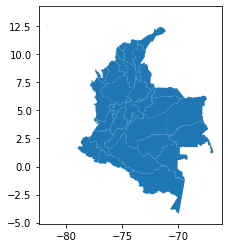

In [ ]:
Departamentos.plot();

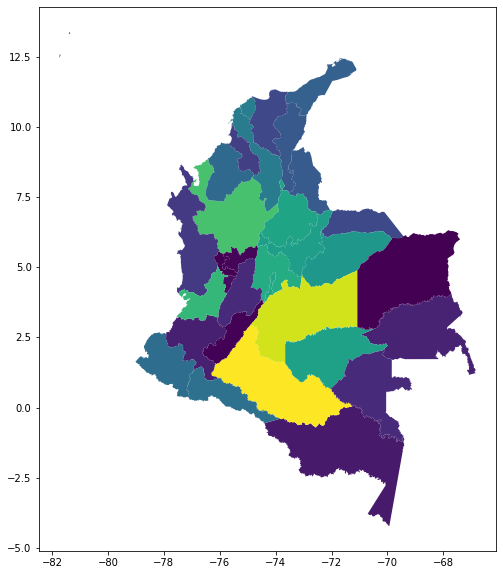

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
Departamentos.plot(column='ems_nts_GE', ax=ax);